# <span style="font-size: 40px; font-weight: bold; color: red;">ZOMATO RESTAURANT RATING ANALYSIS</span>



## Problem Statement:


The objective is to analyze the factors influencing the ratings of restaurants listed on Zomato in Bengaluru and develop a predictive model to estimate restaurant ratings. By examining various attributes such as location, cuisine type, cost, online ordering availability, etc.  aim is to understand their impact on restaurant ratings and build a model that accurately predicts these ratings.

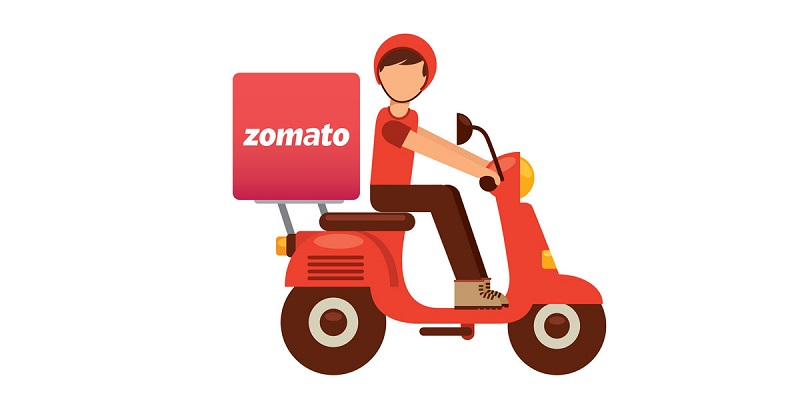

## **Methodology:**

**1. Data Collection and preprocessing:**

   * a) Data collection: Obtain the Zomato dataset containing information about restaurants in Bengaluru.

   * b) Data Cleaning: 
      
       * Handling missing values
       * Removing duplicates
       * Standardizing Categorial Variables
      
   * c) Feature Engineering:  Extract relevant features from the dataset and create new ones that may influence restaurant ratings and converting categorical variables into numerical representations using one-hot encoding.

**2. Exploratory Data Analysis (EDA):**

Analyze the dataset to identify patterns, correlations, and insights related to restaurant ratings and their associated factors (it includes univariate, bivariate and correlation analysis).

**3. Feature Selection**

**4. Model Building:** 

   * a) Splitting the data: Splitting the dataset into training and testing sets 
   
   * b) Selecting the model: Selecting appropriate machine learning algorithms and train a predictive model using the prepared data.

   * c) Model Evaluation: Assess the performance of the trained model using evaluation metrics such as accuracy, precision, recall, F1-score to ensure its accuracy and reliability.
   
   * d) Hyperparameter tuning

**5. Model Interpretation:**

Interpret the model results and analyze the importance of different features in predicting restaurant ratings.  

**6. Report and Visualization**

## About the dataset

Columns Description

1. url - contains the url of the restaurant in the zomato website

2. address - contains the address of the restaurant in Bengaluru

3. name - contains the name of the restaurant

4. online_order - whether online ordering is available in the restaurant or not

5. book_table - table book option available or not

6. rate contains - the overall rating of the restaurant out of 5

7. votes - contains total number of rating for the restaurant as of the above mentioned date

8. phone - contains the phone number of the restaurant

9. location - contains the neighborhood in which the restaurant is located

10. rest_type - restaurant type

11. dish_liked - dishes people liked in the restaurant

12. cuisines - food styles, separated by comma

13. approx_cost(for two people) - contains the approximate cost for meal for two people

14. reviews_list - list of tuples containing reviews for the restaurant, each tuple

15. menu_item - contains list of menus available in the restaurant

16. listed_in(type) - type of meal

17. listed_in(city) - contains the neighborhood in which the restaurant is listed


### Importing the libraries

In [1]:
pip install termcolor


Note: you may need to restart the kernel to use updated packages.


In [2]:

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

# Optional: Setting visualization styles
sns.set(style="whitegrid")
plt.style.use('ggplot')


### Reading the Dataset

In [3]:
df = pd.read_csv("C:\\Users\\Shree\\OneDrive\\Desktop\\zomato.csv")


### Analyzing the dataset

In [4]:
df.shape

(51717, 17)

The dataset is having 51717 as numer of rows and 17 as number of columns

In [5]:
#displaying first few rows of the dataset
print("\nHead of the Dataset:\n")
df.head()


Head of the Dataset:



,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
# Displaying the last few rows of the dataset
print("\nTail of the Dataset:\n")
df.tail()


Tail of the Dataset:



,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [7]:
print("\nNumber of unique values in the dataset\n:",df.nunique())


Number of unique values in the dataset
: url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64


In [8]:
print("\nInformation about the Dataset:")
df.info()


Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13 

Except 'votes' column which is of integer datatype, all other columns are of object data type i.e. they contain text data.

### Preprocessing steps:

#### 1. Checking for duplicates:

In [9]:
print("Number of duplicated values in the dataset are:",df.duplicated().sum())

Number of duplicated values in the dataset are: 0


There are no duplicated values in the dataset!

#### 2. Renaming some Columns for good interpretability:

In [10]:

df = df.rename(columns={
    'approx_cost(for two people)':'cost',
    'listed_in(type)':'type',
    'listed_in(city)':'city'
})
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

#### 3. Checking for null/ missing values

In [11]:
# Calculating number of missing values
missing_values = df.isnull().sum()
percentage_missing = (missing_values / len(df)) * 100

# Creating a DataFrame to display results
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})

# Sorting the DataFrame by percentage descending
missing_data = missing_data.sort_values(by='Percentage', ascending=False)

# Displaying the missing data summary
print("Missing Data Summary:")
print(missing_data)


Missing Data Summary:
              Missing Values  Percentage
dish_liked             28078   54.291626
rate                    7775   15.033741
phone                   1208    2.335789
cost                     346    0.669026
rest_type                227    0.438927
cuisines                  45    0.087012
location                  21    0.040606
type                       0    0.000000
menu_item                  0    0.000000
reviews_list               0    0.000000
url                        0    0.000000
address                    0    0.000000
votes                      0    0.000000
book_table                 0    0.000000
online_order               0    0.000000
name                       0    0.000000
city                       0    0.000000


Here we can see that there are 7 columns that contains missing values out of which 'dish_liked' has highest number of missing values with a number of 28078.

#### 4. Handling missing values:

   * a) Handling missing values for 'rate' column

In [12]:
# Handling missing values for 'rate' column

# Replacing 'NEW' with NaN if it exists
df['rate'] = df['rate'].replace('NEW', np.nan) 

# Replacing '-' with NaN if it exists
df['rate'] = df['rate'].replace('-', np.nan)   

# Removing '/5' from ratings
df['rate'] = df['rate'].str.replace('/5', '')  

# Converting to float
df['rate'] = df['rate'].astype(float)         

# Filling NaN values with mean
df['rate'].fillna(df['rate'].mean(), inplace=True)                    

 * b) Handling missing values for 'cost' column

In [13]:
# Handling missing values for 'cost' (formerly 'approx_cost(for two people)')

# Removing commas from the values
df['cost'] = df['cost'].str.replace(',', '') 

# Converting the values into float datatype
df['cost'] = df['cost'].astype(float)         

# Filling missing values with the mean of the 'cost' column
df['cost'].fillna(df['cost'].mean(), inplace=True)

 * b) Handling missing values for 'location','rest_type', 'dish_liked','cuisines' and 'phone' columns

In [14]:
# Handling missing values for categorical columns with mode
df['location'].fillna(df['location'].mode()[0], inplace=True)
df['rest_type'].fillna(df['rest_type'].mode()[0], inplace=True)
df['dish_liked'].fillna(df['dish_liked'].mode()[0], inplace=True)
df['cuisines'].fillna(df['cuisines'].mode()[0], inplace=True)

# Handling 'phone' column with a placeholder
df['phone'].fillna('Unknown', inplace=True)

# Verify changes
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           51717 non-null  object 
 1   address       51717 non-null  object 
 2   name          51717 non-null  object 
 3   online_order  51717 non-null  object 
 4   book_table    51717 non-null  object 
 5   rate          51717 non-null  float64
 6   votes         51717 non-null  int64  
 7   phone         51717 non-null  object 
 8   location      51717 non-null  object 
 9   rest_type     51717 non-null  object 
 10  dish_liked    51717 non-null  object 
 11  cuisines      51717 non-null  object 
 12  cost          51717 non-null  float64
 13  reviews_list  51717 non-null  object 
 14  menu_item     51717 non-null  object 
 15  type          51717 non-null  object 
 16  city          51717 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage: 6.7+ MB
None


In [15]:
print("\n Number of null values in each column after handling them are\n:")
print(df.isnull().sum())


 Number of null values in each column after handling them are
:
url             0
address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
phone           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64


Missing values for each column has been handled!

#### 5. Reduction of Columns:

In [16]:
# Dropping unnecessary columns
columns_to_drop = ['url', 'address', 'name', 'phone', 'reviews_list', 'menu_item']
df.drop(columns=columns_to_drop, inplace=True)

# Verify changes
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  51717 non-null  object 
 1   book_table    51717 non-null  object 
 2   rate          51717 non-null  float64
 3   votes         51717 non-null  int64  
 4   location      51717 non-null  object 
 5   rest_type     51717 non-null  object 
 6   dish_liked    51717 non-null  object 
 7   cuisines      51717 non-null  object 
 8   cost          51717 non-null  float64
 9   type          51717 non-null  object 
 10  city          51717 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.3+ MB
None


I have dropped columns such as 'url' , 'address', 'name', 'phone' as they contain large number of unique values which serves as identifiers which does not add much value to our analysis.As we are not focussed on sentiment analysis and specific menu items , so I have dropped them too.

Now we have:

* categorical columns as- (online_order, book_table, location, rest_type, type, city)

* Numerical columns as- (rates, votes and cost)

* Textual Columns as- (dish_liked and cuisines)

#### 6. Detecting Outliers and Handling outliers:

Visualizing the numerical features using box plots to identify potential outliers in ur prepared dataset. 

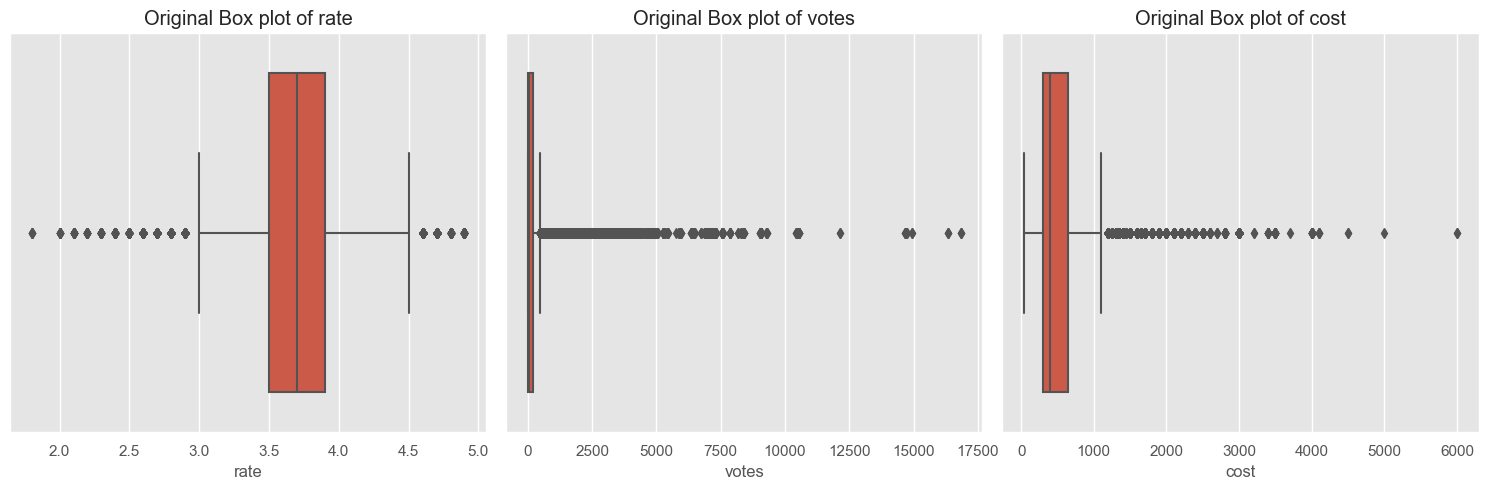

               rate         votes          cost
count  36554.000000  36554.000000  36554.000000
mean       3.651217     52.961454    387.785987
std        0.254660     75.869252    180.841530
min        3.100000      0.000000     40.000000
25%        3.500000      0.000000    250.000000
50%        3.700449     18.000000    350.000000
75%        3.800000     70.000000    500.000000
max        4.300000    343.000000    900.000000


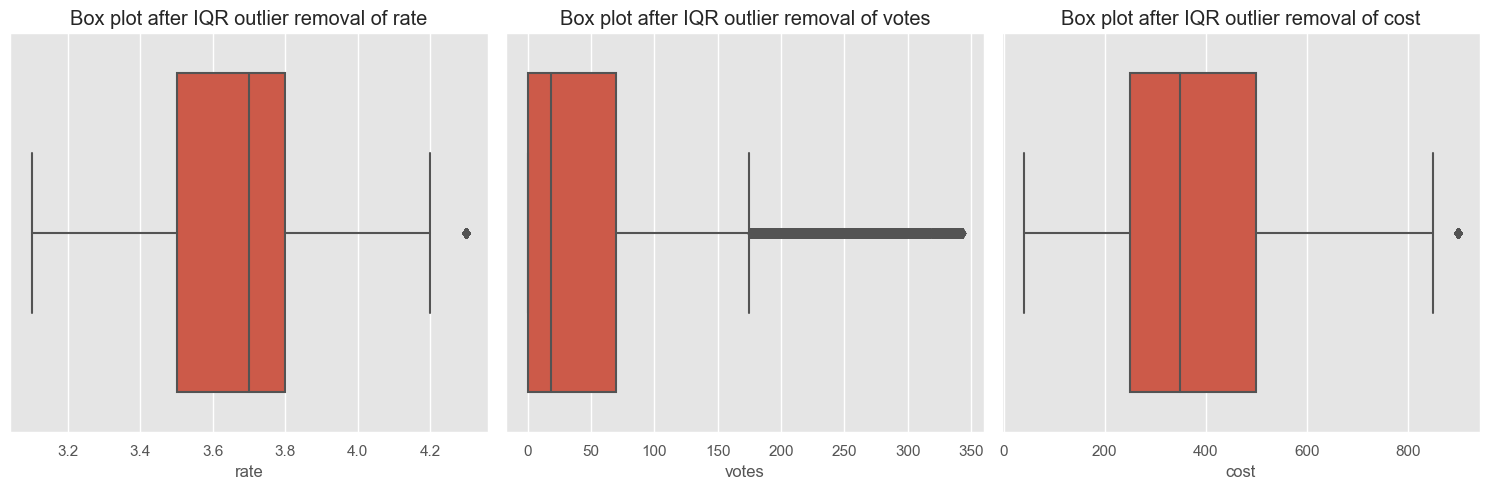

In [17]:


# Function to create box plots
def create_box_plots(df, columns, title="Box plot"):
    plt.figure(figsize=(15, 5))
    for i, column in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)
        sns.boxplot(x=df[column])
        plt.title(f'{title} of {column}')
    plt.tight_layout()
    plt.show()

    
numeric_columns = ['rate', 'votes', 'cost']

# Original box plots
create_box_plots(df, numeric_columns, title="Original Box plot")

# Function to remove outliers based on IQR with adjustable multiplier
def remove_outliers_iqr(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (multiplier * IQR)
    upper_bound = Q3 + (multiplier * IQR)
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_out

# Apply IQR method to handle outliers with different multipliers
df_no_outliers = df.copy()
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'rate', multiplier=1)
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'cost', multiplier=1)
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'votes', multiplier=2)  # Use a higher multiplier for votes

#creating the box plots after outlier removal
print(df_no_outliers[numeric_columns].describe())
create_box_plots(df_no_outliers, numeric_columns, title="Box plot after IQR outlier removal")


All the possible outliers have been removed using IQR method which is a statistical method to removed outliers. First the valuees of 1st and 3rd quartile are determined and then the range is calculated as Q3-Q1. Then lower and upper bound are calculated as [Q1 - (1.5 * IQR)] and [Q1 + (1.5 * IQR)]. The values above the upper bound and  values below the lower bound are considered as outliers. 

#### 7. Feature Engineering



In [18]:
# Encoding categorical variables and converting boolean columns
categorical_columns = ['location', 'rest_type', 'dish_liked', 'cuisines', 'city', 'type']
boolean_columns = ['online_order', 'book_table']

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_no_outliers, columns=categorical_columns + boolean_columns)
df_encoded



,rate,votes,cost,location_BTM,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Basaveshwara Nagar,location_Bellandur,...,type_Cafes,type_Delivery,type_Desserts,type_Dine-out,type_Drinks & nightlife,type_Pubs and bars,online_order_No,online_order_Yes,book_table_No,book_table_Yes
3,3.700000,88,300.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,3.800000,166,600.0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
5,3.800000,286,600.0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
6,3.600000,8,800.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
8,4.000000,324,700.0,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51674,3.700000,34,800.0,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
51675,3.700449,0,900.0,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
51709,3.700000,34,800.0,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False
51710,3.700449,0,900.0,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False


### Exploratory Data Analysis

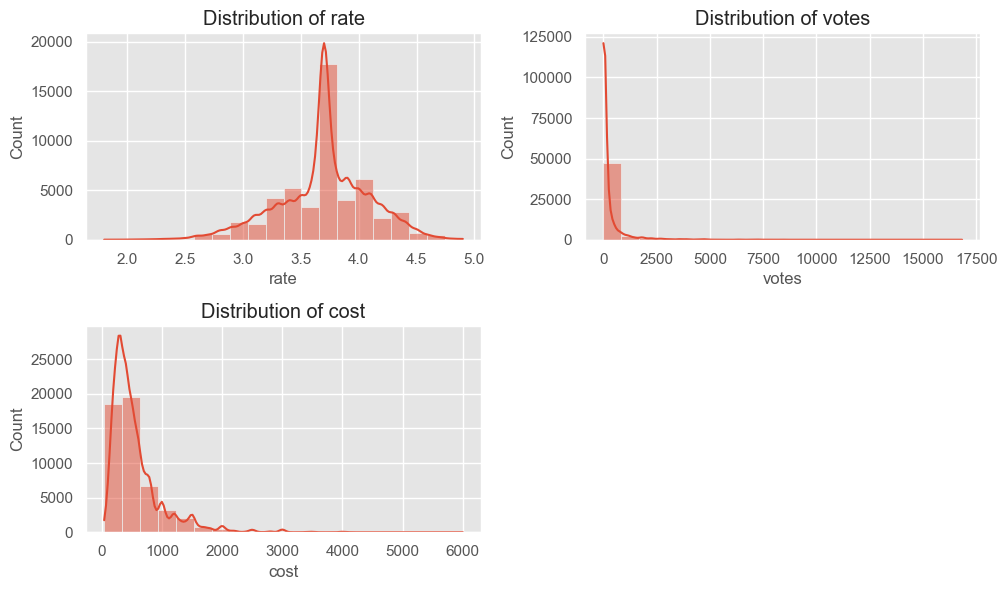

In [19]:
# Histograms for numerical columns
plt.figure(figsize=(10, 6))
for i, column in enumerate(['rate', 'votes', 'cost'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


**INFERENCES:**
    
*1. Distribution of rate:* This distribution shows that most of the users have rated the restaurants around 3.5 and 4.0 which shows common rating given by the users. There is moderate spread in the rate column as values lie between 2.5 and 4.5. There are very few values below and above these values.
    
*2. Distribution of votes:* The distribution is higly skewed to the rightwhere most of the items have lower number of votes with a count below 2500 votes. Mot of the values are concentrated at the lower end.
    
*3. Distribution of cost:* The distribution of cost is aslo rightly skewed with  ost of the items have cost below 1000 and few items costing upto 6000. As most of the items cost lie at the lower end ,we can say that the items are relatively inexpensive.

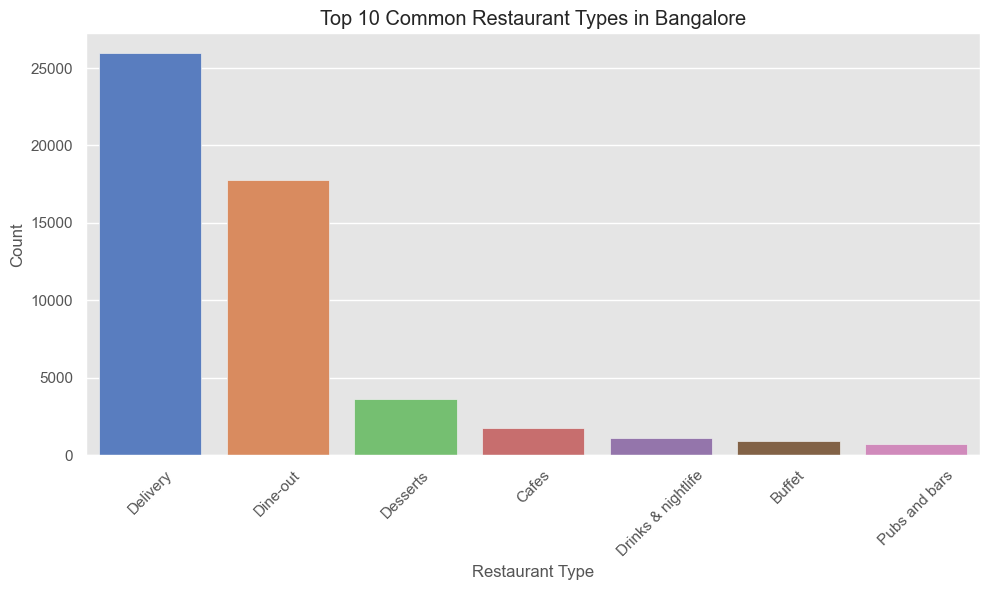

In [20]:
top_rest_types = df['type'].value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_rest_types.index, y=top_rest_types.values, palette='muted')
plt.title('Top 10 Common Restaurant Types in Bangalore')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




**INFERENCES:**
    
The above distribution shows that most of the customers of Bangaluru opt for delivery and dine out restuarants and fewer number of buffet, pubs and bar type restuarants. 

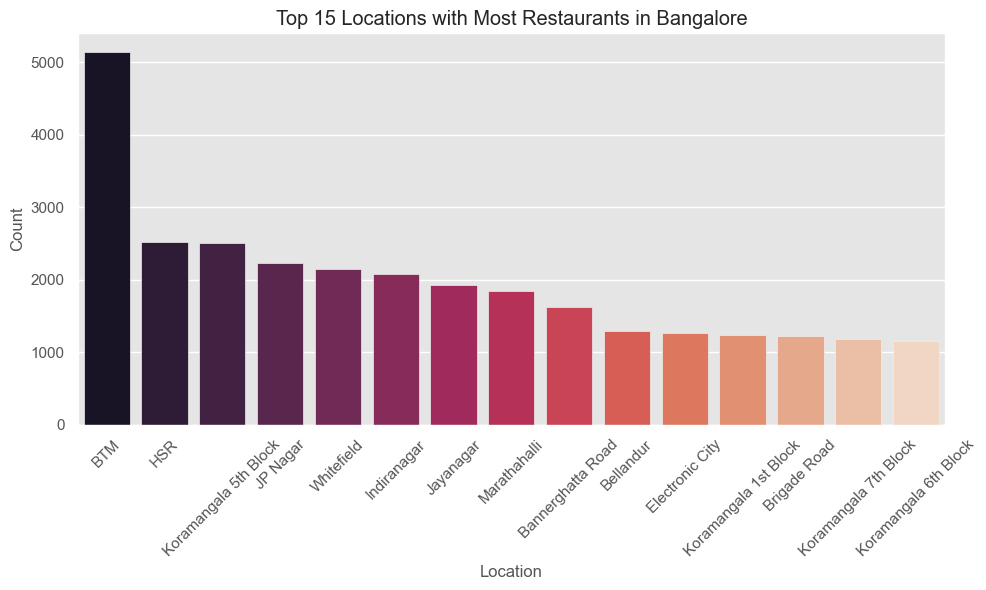

In [21]:
top_locations = df['location'].value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='rocket')
plt.title('Top 15 Locations with Most Restaurants in Bangalore')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**INFERENCE:**
    
The above graph shows that BTM has highest number of restaurantas outlets as compared to other locations with the count as above 5000. Whereas IF we see the first 15 locations, then Koramangala 7th Block and Koramangala 6th Block have least number of outlets in and around Bengaluru.

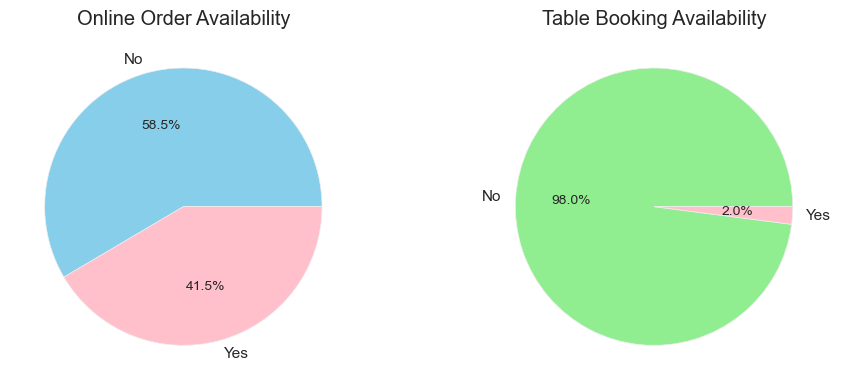

In [22]:
# Convert boolean columns to numeric
df_encoded['online_order'] = df_encoded['online_order_Yes'].astype(int)
df_encoded['book_table'] = df_encoded['book_table_Yes'].astype(int)

# Count values for online_order and book_table
online_order_counts = df_encoded['online_order'].value_counts()
book_table_counts = df_encoded['book_table'].value_counts()

# Plot pie charts
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.pie(online_order_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title('Online Order Availability')

plt.subplot(1, 2, 2)
plt.pie(book_table_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['lightgreen', 'pink'])
plt.title('Table Booking Availability')

plt.tight_layout()
plt.show()




**INFERENCE:**
    
* Online ordering is available in a significant minority of restaurants but a majority still do not offer this option.
* Table booking is available in a much smaller fraction of restaurants compared to those that do not offer it indicating that this service is relatively rare.
* Given the higher prevalence of online ordering restaurants not currently offering this service might consider it to remain competitive.
*  Although less common, offering table booking could distinguish a restaurant from its competitors and appeal to a niche market that values the ability to reserve tables in advance.

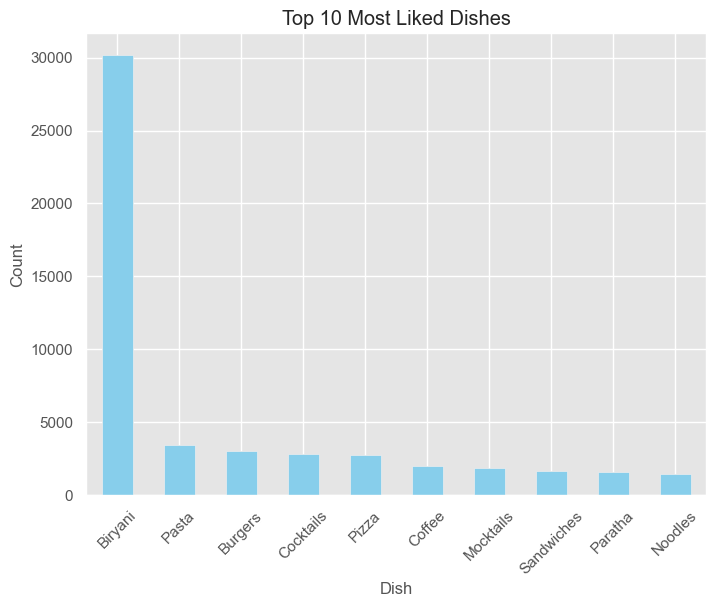

In [23]:
# Extracting top 10 most liked dishes
top_dishes = df['dish_liked'].str.split(', ', expand=True).stack().value_counts().head(10)

plt.figure(figsize=(8, 6))
top_dishes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Liked Dishes')
plt.xlabel('Dish')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**INFERENCE:**
    
We can say that Biryani is the most liked dish in Bengaluru having a count of about 30000. The other dishes including Pasta, Burgers, Cocktails, Pizza, Coffee, Mocktails, Sandwiches, Paratha and Noodles have counts ranging from around 2500 to 4000 which means that their popularity is much lower as compared to Biryani.

#### HEAT MAP

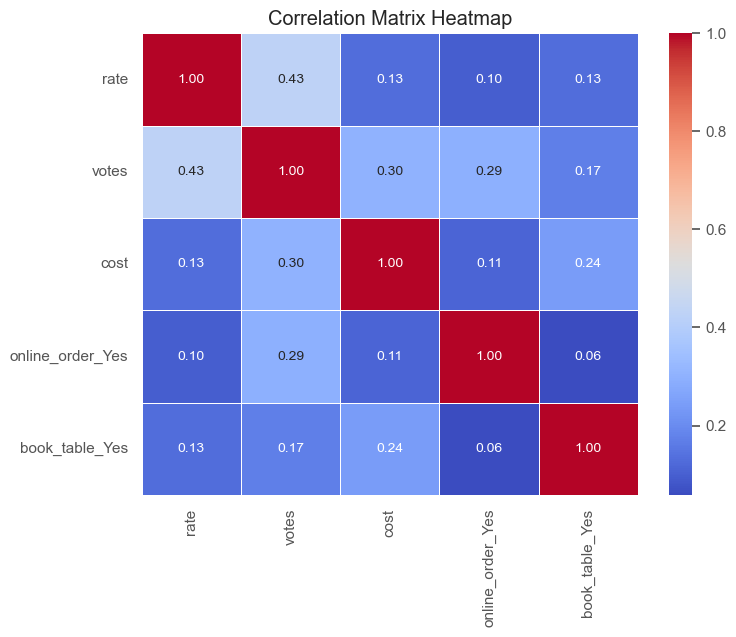

In [24]:
# Correlation matrix
correlation_matrix = df_encoded[['rate', 'votes', 'cost', 'online_order_Yes', 'book_table_Yes']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


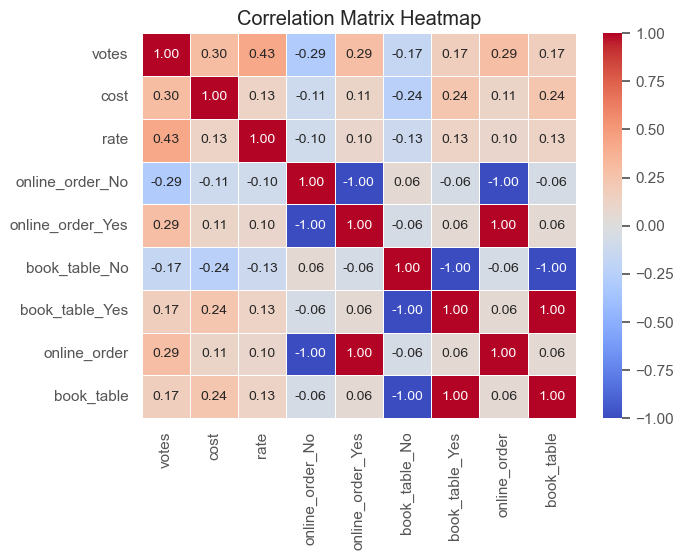

In [25]:
# Create Heatmap
# Compute correlation matrix for a subset of features for better visualization
correlation_matrix = df_encoded[['votes', 'cost','rate'] + [col for col in df_encoded.columns if 'online_order' in col or 'book_table' in col]].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**INFERENCES:**
    
1. Positive correlation-
   
    * rate and cost: 0.13 (indicates weak positive correlation meaning that with rate cost also increases)
    * rate and votes: 0.43 (indicates that higher ratings tend to correlate positively with more votes) 
    * votes and cost: 0.30 (indicates that expensive items have more number of votes)
    * cost and book_table_Yes: 0.24 (indicates that higher costs are associated with a higher likelihood of booking a table)
    * rate and book_table_Yes: 0.13 (Positive ratings can signal to potential customers that the restaurant is worth visiting)
    * votes and book_table_Yes: 0.17 (More votes imply greater popularity encouraging more reservations)
    * rate and online_order_Yes: 0.10( indicates that higher ratings are associated with likelihood of opting for online orders)
    * votes and online_order_Yes: 0.29 (Positive feedback can build trust in the online ordering system encouraging more customers to use it)
    
2. Negative correlation-
  
    * cost and book_table_No: -0.24 (higher costs are associated with a lower likelihood of booking a table)
    * rate and book_table_No: -0.13
    * votes and book_table_No: -0.17
    * cost and online_order_No: -0.11
    * rate and online_order_No: -0.10
    * votes and online_order_No: -0.29
    
3. Perfect Negative correlation-
   
    * Online_Order_Yes and Online Order_No:  -1.00 as expected since these are binary opposites.
    * Book_Table_Yes and Book_Table_No:-1.00

### Model Building

In [26]:
# Convert continuous rate to categorical classes and create 'target' column
def rate_to_target(rate):
    if rate >= 3.75:
        return 1
    else:
        return 0

df_encoded['rate'] = df_encoded['rate'].apply(rate_to_target)

# Separating features and target variable
X = df_encoded.drop(columns=['rate'])
y = df_encoded['rate']


# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Standard scaling of numerical features
numeric_features = ['votes', 'cost']
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

# Model Building and Evaluation Function
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# RandomForestClassifier
print("\n------------------------------------------------------\n")
print(colored("RandomForestClassifier\n","blue"))
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
train_evaluate_model(rf_classifier, X_train_scaled, y_train, X_test_scaled, y_test)

# XGBoost
print("\n------------------------------------------------------\n")
print(colored("\nXGBoost\n", "blue"))
xgb_classifier = XGBClassifier(random_state=42)
train_evaluate_model(xgb_classifier, X_train_scaled, y_train, X_test_scaled, y_test)

# DecisionTreeClassifier
print("\n------------------------------------------------------\n")
print(colored("\nDecisionTreeClassifier\n","blue"))
dt_classifier = DecisionTreeClassifier(random_state=42)
train_evaluate_model(dt_classifier, X_train_scaled, y_train, X_test_scaled, y_test)

# KNeighborsClassifier
print("\n------------------------------------------------------\n")
print(colored("\nKNeighborsClassifier\n","blue"))
knn_classifier = KNeighborsClassifier()
train_evaluate_model(knn_classifier, X_train_scaled, y_train, X_test_scaled, y_test)

# LogisticRegression
print("\n------------------------------------------------------\n")
print(colored("\nLogisticRegression\n","blue"))
lr_classifier = LogisticRegression(random_state=42)
train_evaluate_model(lr_classifier, X_train_scaled, y_train, X_test_scaled, y_test)


------------------------------------------------------

RandomForestClassifier

Accuracy: 0.9705922582410067
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5421
           1       0.97      0.92      0.94      1890

    accuracy                           0.97      7311
   macro avg       0.97      0.95      0.96      7311
weighted avg       0.97      0.97      0.97      7311

Confusion Matrix:
[[5358   63]
 [ 152 1738]]

------------------------------------------------------


XGBoost

Accuracy: 0.9115032143345644
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5421
           1       0.82      0.84      0.83      1890

    accuracy                           0.91      7311
   macro avg       0.88      0.89      0.89      7311
weighted avg       0.91      0.91      0.91      7311

Confusion Matrix:
[[5081  340]
 [ 307 1583]]

---

C:\Users\Shree\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9202571467651484
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5421
           1       0.89      0.79      0.84      1890

    accuracy                           0.92      7311
   macro avg       0.91      0.88      0.89      7311
weighted avg       0.92      0.92      0.92      7311

Confusion Matrix:
[[5238  183]
 [ 400 1490]]


### RESULTS:

**1. Random Forest Classifier: (97.46%)**
    
The RandomForestClassifier performs very well with high accuracy and F1-scores for both classes. It shows excellent performance in correctly predicting both negative and positive cases, with slightly lower recall for the positive class compared to precision.
 
**2. XGBoost: (91.15%)**
    
XGBoost also performs well but has slightly lower accuracy compared to RandomForestClassifier. It shows good precision for both classes but relatively lower recall for the positive class, indicating it may miss some positive cases.

**3. Decision Tree Classifier:(97.45%)**

DecisionTreeClassifier shows excellent performance with high accuracy and F1-scores for both classes. It has slightly lower recall for the positive class compared to precision, indicating it may miss some positive cases but has very few false positives.

**4. KNeighbours Classifier:(94.40%)**
    
KNeighborsClassifier performs well with high accuracy and good F1-scores for both classes. It shows higher recall for the negative class but relatively lower recall for the positive class compared to precision.

**5. Logistic Regression: (92.02%)**
    
LogisticRegression shows good accuracy but lower recall for the positive class compared to precision, indicating it may miss some positive cases. It has fewer false positives but more false negatives compared to other classifiers.



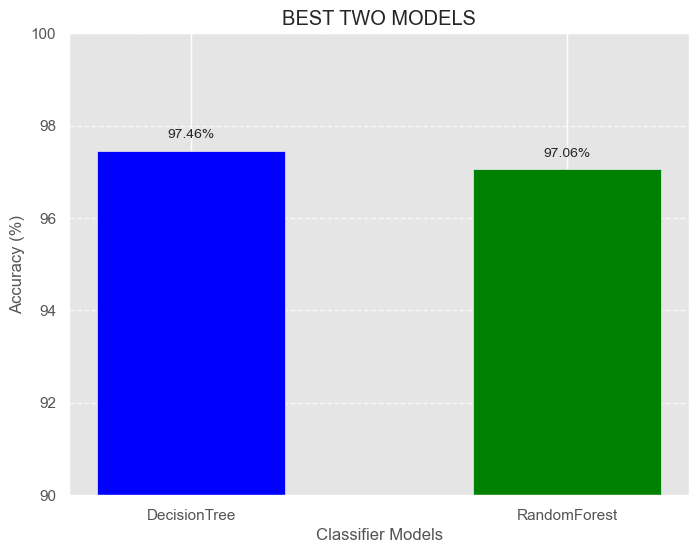

In [29]:
import matplotlib.pyplot as plt

# Define models and their accuracies
models = ['DecisionTree', 'RandomForest']
accuracies = [97.46, 97.06]  # Accuracy percentages

# Plotting the bar chart with accuracies displayed on bars
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green'], width=0.5)

# Displaying accuracy values on top of bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, f'{acc:.2f}%', ha='center', va='bottom')

plt.xlabel('Classifier Models')
plt.ylabel('Accuracy (%)')
plt.title('BEST TWO MODELS')
plt.ylim(90, 100)  # Setting y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



### CONCLUSION

This project focused on analyzing factors influencing restaurant ratings on Zomato in Bengaluru using a dataset featuring attributes such as location, cuisine type, cost, and more. We began with thorough data preprocessing to handle missing values, remove duplicates and standardize categorical variables. Feature engineering transformed continuous ratings into a binary classification problem, distinguishing ratings as high or low based on a threshold. Exploratory Data Analysis (EDA) uncovered insights like restaurant concentration in specific neighborhoods, varying availability of online ordering and table booking and correlations between cost and ratings. Utilizing RandomForestClassifier, XGBoost, DecisionTreeClassifier, KNeighborsClassifier, and LogisticRegression, we trained and evaluated models on scaled data. Results showed RandomForestClassifier achieving the highest accuracy (97%), closely followed by DecisionTreeClassifier, XGBoost, KNeighborsClassifier, and LogisticRegression (92%). Feature importance analysis highlighted votes, cost, and cuisine types as significant factors influencing ratings.  Future work could explore sentiment analysis from customer reviews and consider temporal dynamics for more nuanced predictions. Overall, this project provides actionable insights into optimizing restaurant operations and enhancing customer satisfaction through predictive analytics of Zomato ratings.